In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Problem 1.3 

In [2]:
## Problem 1.3 #activation functions
tf.nn.sigmoid
tf.nn.relu
tf.tensordot

def nn_layer(x, w, b, f):
    '''
    transformation for a single layer of a neural net

    x: array on inputs, shape: (batch size, input dim)
    w: array of weights, shape: (input dim, output dim)
    b: array of biases, shape: (output dim)
    f: activation function
'''
    return f(tf.tensordot(x, w, axes = 1) + b)

def nn_2layers(x, params, f_hidden, f_out):
    h = nn_layer(x, params[0], params[1], f_hidden)
    y_hat = nn_layer(h, params[2], params[3], f_out)
    return y_hat

## Problem 1.4

In [3]:
###Problem 1.4 ## Problem 1.4
w1 = tf.constant([[1, -1, 0, 1],[0, 0, 0.5, 1]], dtype = tf.float32)
b1 = tf.constant([0, 0, 1, 0], dtype = tf.float32)
w2 = tf.constant([1, 0, -1, 1], dtype = tf.float32)
b2 = tf.constant([1], dtype = tf.float32)
x = tf.constant([[1, -1],[0, -1],[0, 1]], dtype = tf.float32)
yhat = nn_2layers(x, [w1, b1, w2, b2], tf.nn.relu, tf.nn.sigmoid)
print(yhat)

tf.Tensor([0.81757444 0.6224593  0.6224593 ], shape=(3,), dtype=float32)


The class probabilities associated with the forward pass of each sample are 0.8176, 0.6225, 0.6225 

## Problem 2.2

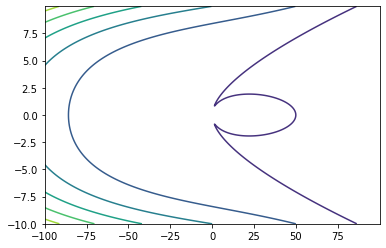

In [4]:
delta = 0.01
x = np.arange(-100.0, 100.0, delta)
y = np.arange(-10.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
Z = (3-X**3) + 50*(2*Y**2-X)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z) 

## Problem 2.3

In [5]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2+100*x-200*y**2
    df_dy = 800*y**3 - 400*x*y
    return np.array([df_dx, df_dy])

In [6]:
def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point is None:
        starting_point = np.random.uniform(-5,5,2)
    
    traj = np.zeros((iterations+1,2))
    
    traj[0,:] = starting_point
    for i in range(iterations):
        traj[i+1,:] = traj[i,:] - learning_rate*grad_f(traj[i,:])
    return traj

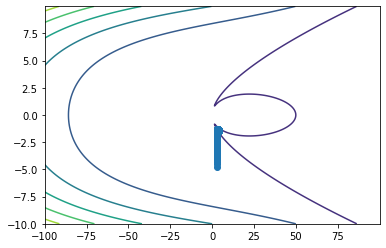

In [16]:
np.random.seed(10)
traj = grad_descent(iterations=10000, learning_rate=3e-6)
plt.contour(X,Y,Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


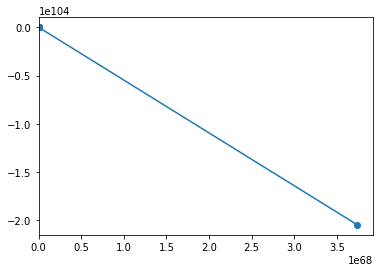

In [17]:
np.random.seed(10)
traj = grad_descent(iterations=10000, learning_rate=1e-4)
plt.contour(X,Y,Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## Problem 2.4

In [18]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):

    if starting_point is not None:
        point = starting_point
    else:
        point = np.random.uniform(-10, 10, size = 2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha * v + epsilon * grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


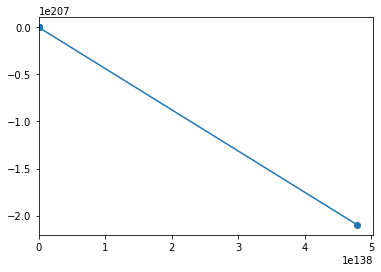

In [19]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=2, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## Problem 3.2

## Problem 3.3

## Problem 3.4

## Problem 3.5

## Problem 3.6